## PART 1: Data Transformation and Exploratory Data Analysis Using Python and SQL

In [1]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

## Data

The dataset I obtained from Kaggle.com contains sales and invoice data from Atliq Hardwares, a computer hardware producer in India. The data covers transactions between 2017 and 2021. You can access the dataset using the following link: https://www.kaggle.com/datasets/ad043santhoshs/sales-domain.

In [2]:
salesdata = pd.read_csv('Sales_domain.csv', encoding='ISO-8859-1')

## Data Transformation

To transform the data, I have performed the following two processes:

- Converted the date column into a datetime format to enable easy sorting and filtering of data based on date.
- Converted the customer code column from an integer to a string data type to avoid accidental aggregation of data during analysis.

In [3]:
salesdata['Date'] = pd.to_datetime(salesdata['Date'], format='%d-%m-%Y')
salesdata['customer_code'] = salesdata['customer_code'].astype(str)

In [4]:
salesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Date                      1048575 non-null  datetime64[ns]
 1   product_code              1048575 non-null  object        
 2   customer_code             1048575 non-null  object        
 3   sold_quantity             1048575 non-null  int64         
 4   fiscal_year               1048575 non-null  int64         
 5   division                  1048575 non-null  object        
 6   segment                   1048575 non-null  object        
 7   category                  1048575 non-null  object        
 8   product                   1048575 non-null  object        
 9   variant                   1048575 non-null  object        
 10  customer                  1048575 non-null  object        
 11  platform                  1048575 non-null  object

**Preview of the data**

In [5]:
salesdata.head(10)

,Date,product_code,customer_code,sold_quantity,fiscal_year,division,segment,category,product,variant,customer,platform,channel,market,sub_zone,region,gross_price,cost_year,manufacturing_cost,pre_invoice_discount_pct
0,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2018,4.6190,0.0824
1,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2019,4.2033,0.0824
2,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2020,5.0207,0.0824
3,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,15.3952,2021,5.5172,0.0824
4,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,14.4392,2018,4.6190,0.0824
5,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,14.4392,2019,4.2033,0.0824
6,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,14.4392,2020,5.0207,0.0824
7,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,14.4392,2021,5.5172,0.0824
8,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,16.2323,2018,4.6190,0.0824
9,2017-09-01,A0118150101,70002017,51,2018,P & A,Peripherals,Internal HDD,AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC,16.2323,2019,4.2033,0.0824


In [6]:
salesdata.describe()

,sold_quantity,fiscal_year,gross_price,cost_year,manufacturing_cost,pre_invoice_discount_pct
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.540025e+01,2.020022e+03,2.050893e+01,2.020028e+03,6.098500e+00,2.322573e-01
std,1.369163e+02,1.125987e+00,3.220415e+00,1.334660e+00,9.597987e-01,5.885463e-02
min,0.000000e+00,2.018000e+03,1.405550e+01,2.018000e+03,4.203300e+00,5.100000e-02
25%,7.000000e+00,2.019000e+03,1.846630e+01,2.019000e+03,5.344800e+00,2.037000e-01
50%,2.000000e+01,2.020000e+03,1.985770e+01,2.020000e+03,5.946900e+00,2.404000e-01
75%,5.100000e+01,2.021000e+03,2.361540e+01,2.021000e+03,7.049800e+00,2.762000e-01
max,4.127000e+03,2.022000e+03,3.030600e+01,2.022000e+03,9.187700e+00,3.099000e-01


## Performing Exploratory Data Analysis

For the exploratory data analysis, I have chosen to use SQL instead of Python Pandas to manipulate the data for plotting purposes. My motivation behind this decision was to practice my SQL skills, which I have been learning in my free time. I will utilize SQL queries to extract the necessary data, and then plot the data using Python's Matplotlib and Seaborn libraries. 

The SQL and Python codes will be display along with the charts and descriptions.

### **1.1 General Metrics**

To begin, let us gain an understanding of the dataset's size and variability in terms of its customer base, market presence, and products.

In [7]:
#unique counts
query = """
SELECT
    COUNT (DISTINCT product) AS unique_product_count,
    COUNT (DISTINCT category) AS unique_product_category,
    COUNT (DISTINCT customer_code) AS unique_customer,
    COUNT (DISTINCT market) AS unique_market
FROM salesdata;
"""
sqldf(query)

,unique_product_count,unique_product_category,unique_customer,unique_market
0,4,2,209,27


**After analyzing the data, I have made the following observations:**

- The dataset contains only a small number of products, consisting of four products in two product categories.
- The dataset has 209 unique customers/clients.
- Atliq Hardwares has a global presence, operating in 27 countries worldwide.

### **1.2 Sales Revenue Metrics**

Now, let's examine the monthly revenue and  growth rate of the company in greater detail. In doing so, we can gain insights into the seasonality and trends of Atliq Hardware's business operations.

In [8]:
#gross sales (monthly revenue)
query = """ 

SELECT 
    Date,
    ROUND(SUM((gross_price * sold_quantity) * (1 - pre_invoice_discount_pct)),2) AS gross_sales
FROM salesdata
GROUP BY date
"""

df_gross_sale = sqldf(query)
df_gross_sale.index = pd.to_datetime(df_gross_sale['Date'])
df_gross_sale = df_gross_sale.resample('M').sum()
df_gross_sale['monthyear'] = df_gross_sale.index.strftime('%b-%Y')

_**1.2.1 Lineplot: Monthly Gross Revenue**_

Text(0.5, 0, 'Month Year')

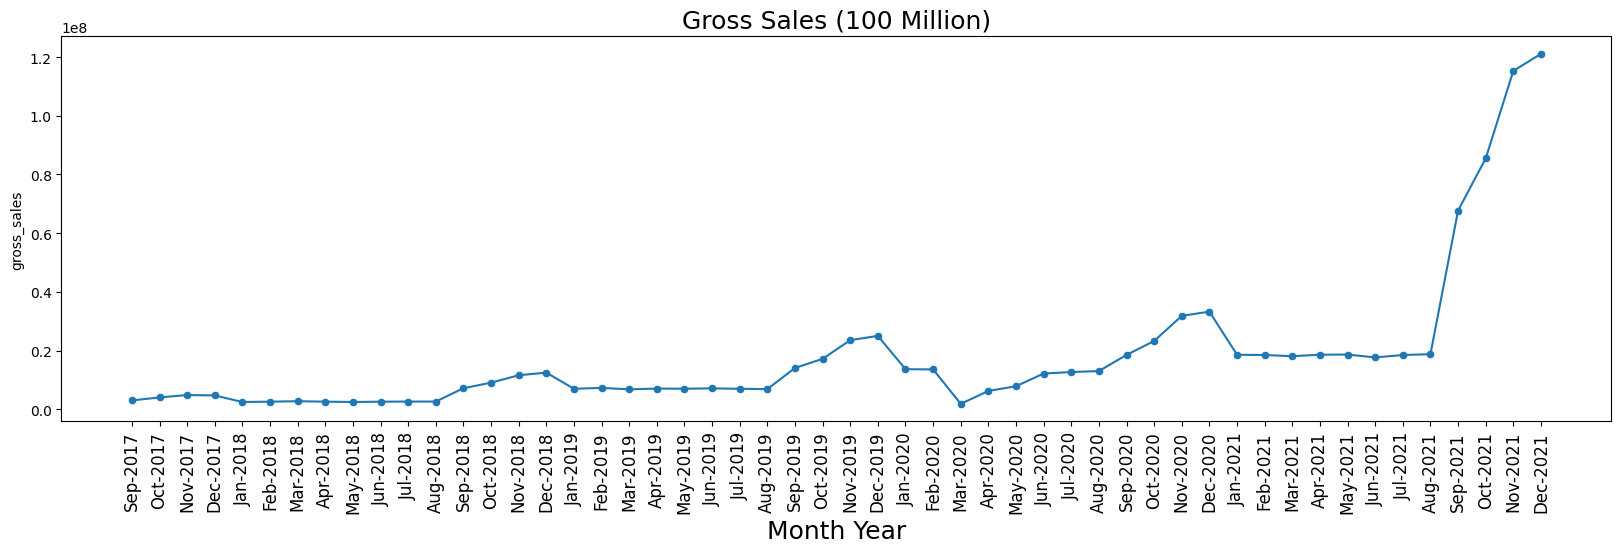

In [9]:
plt.figure(figsize=(20,5))
sns.lineplot(x='monthyear', y='gross_sales', data=df_gross_sale)
sns.scatterplot(x='monthyear', y='gross_sales', data=df_gross_sale)
plt.xticks(rotation=90, fontsize=12)
plt.title('Gross Sales (100 Million)', fontsize=18)
plt.xlabel('Month Year', fontsize=18)

In [10]:
df_gross_sale['growthrate'] = df_gross_sale['gross_sales'].pct_change()


_**1.2.2 Lineplot: Monthly Revenue Growth**_

Text(0.5, 0, 'Month Year')

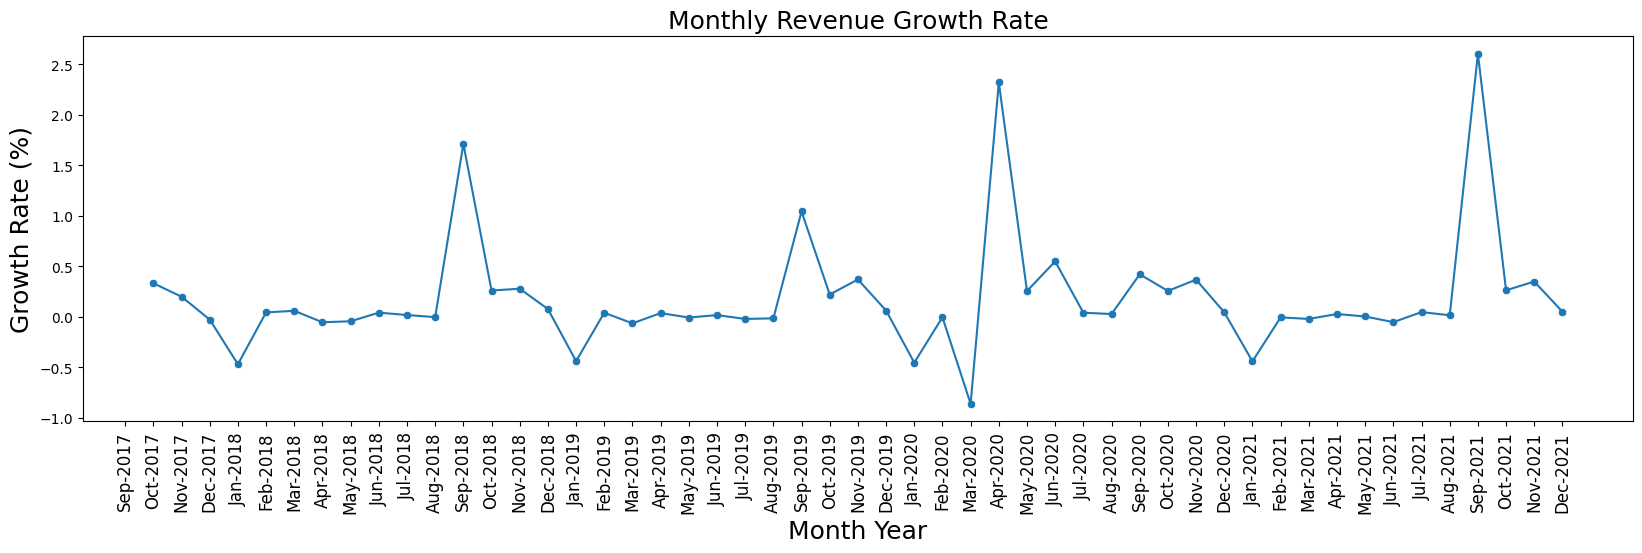

In [11]:
plt.figure(figsize=(20,5))
sns.lineplot(x='monthyear', y='growthrate', data=df_gross_sale)
sns.scatterplot(x='monthyear', y='growthrate', data=df_gross_sale)
plt.title('Monthly Revenue Growth Rate', fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=18)
plt.xlabel('Month Year', fontsize=18)

**After analyzing the monthly revenue data, I have made the following observations:**

- There is a noticeable trend in which the company's monthly revenue experiences a significant increase during the period between August and December every year. This suggests that Atliq Hardware's business is seasonal, and the company's sales activity might be highly influenced by market factors such as holidays and year-end sales.
- Between September and December 2021, the company's monthly revenue jumped dramatically, with more revenue generated than any previous period. This indicates that the company experienced significant growth during the latter part of 2021, which could be due to a variety of factors outside the data given.

The observed pattern in the monthly revenue data presents an opportunity to delve deeper and uncover the reasons for the significant spike during 2021 period. In the next phase of our analysis, we will examine metrics related to customer engagement. By doing so, we can determine whether the company's revenue growth is the result of increased customer activity or other factors.

### **1.3 Customer Metrics**

To determine if there is any relationship between the monthly active customers and the revenue increase, we will examine the metric related to monthly active customers.

In [12]:
query = """
    SELECT
        Date,
        COUNT(DISTINCT customer_code) AS active_customer
    FROM salesdata
    GROUP BY Date
"""
df_active_customer = sqldf(query)
df_active_customer.index = pd.to_datetime(df_active_customer['Date'])
df_active_customer = df_active_customer.resample('M').sum()
df_active_customer['monthyear'] = df_active_customer.index.strftime('%b-%Y')

_**1.3.1 Lineplot: Monthly Active Customer**_

Text(0, 0.5, 'Active Customer')

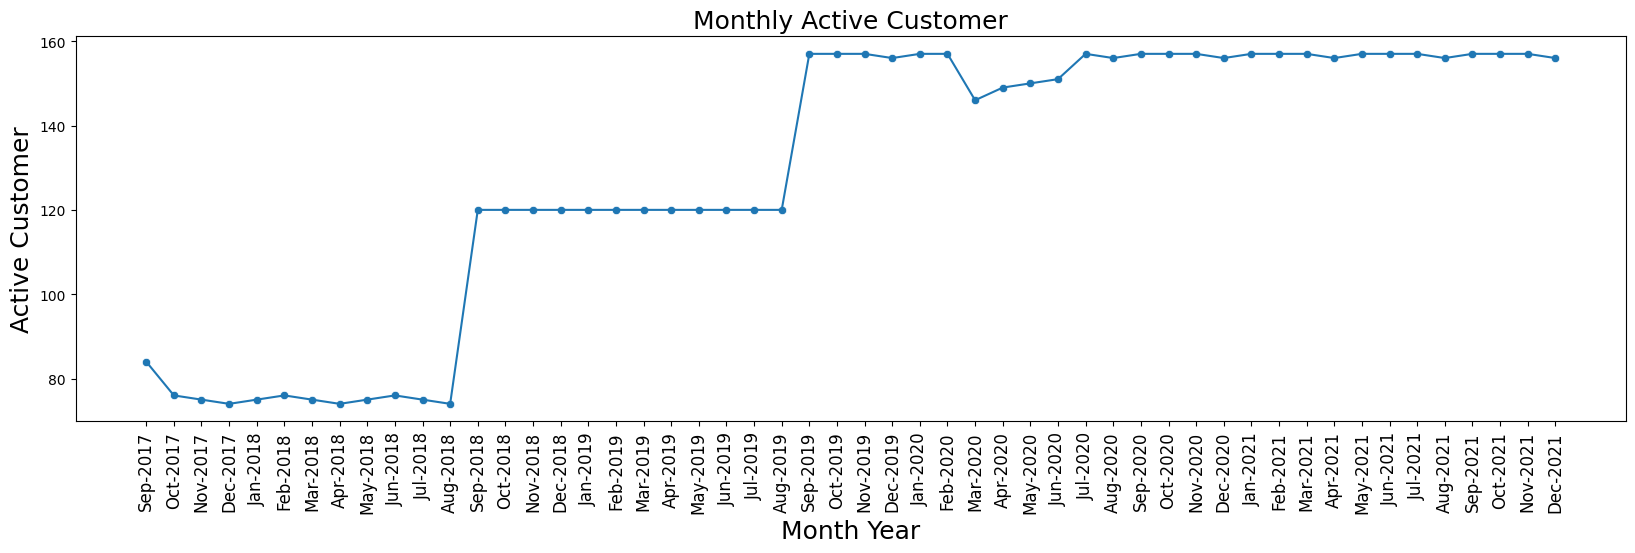

In [13]:
plt.figure(figsize=(20,5))
sns.lineplot(x='monthyear', y='active_customer', data=df_active_customer)
sns.scatterplot(x='monthyear', y='active_customer', data=df_active_customer)
plt.xticks(rotation=90, fontsize=12)
plt.title('Monthly Active Customer', fontsize=18)
plt.xlabel('Month Year', fontsize=18)
plt.ylabel('Active Customer', fontsize=18)

**After analyzing metrics related to customer engagement, I have made the following observations:**

- Between 2017 and 2019, there is a noticeable increase in customer activity every September. This observation corresponds with what we previously discovered in the monthly revenue data, which suggests that the sudden increase in customer activity could have a significant impact on the monthly revenue.
- However, there is a contradiction in the later years, specifically in September 2021. During that period, there was a dramatic increase in monthly revenue, but customer activity remained relatively the same since 2019. This finding indicates that other factors may have contributed to the company's revenue growth during this period, such as a change in marketing strategy or the introduction of new product lines.

While analyzing metrics related to customer engagement did provide some insights, the question of the sudden revenue spike in 2021 remains unanswered. To gain a more comprehensive understanding of the situation, we will examine additional metrics and explore further to find answers to the question we posed earlier.

### **1.4 Order/Transaction Metrics**

To investigate if customers made any additional orders that could have contributed to the revenue increase in 2021, we will analyze the metric related to monthly orders.

In [14]:
query = """
WITH temporderid AS (
    SELECT
        Date,
        customer_code,
        SUM(sold_quantity * gross_price) AS total_revenue
    FROM salesdata
    GROUP BY Date, customer_code
)


SELECT 
    Date,
    COUNT(*) AS transaction_count
FROM temporderid
GROUP BY Date
"""

df_monthly_order = sqldf(query)
df_monthly_order.index = pd.to_datetime(df_monthly_order['Date'])
df_monthly_order = df_monthly_order.resample('M').sum()
df_monthly_order['monthyear'] = df_monthly_order.index.strftime('%b-%Y')

_**1.4.1 Lineplot: Monthly Orders**_

Text(0, 0.5, 'Amount of Order')

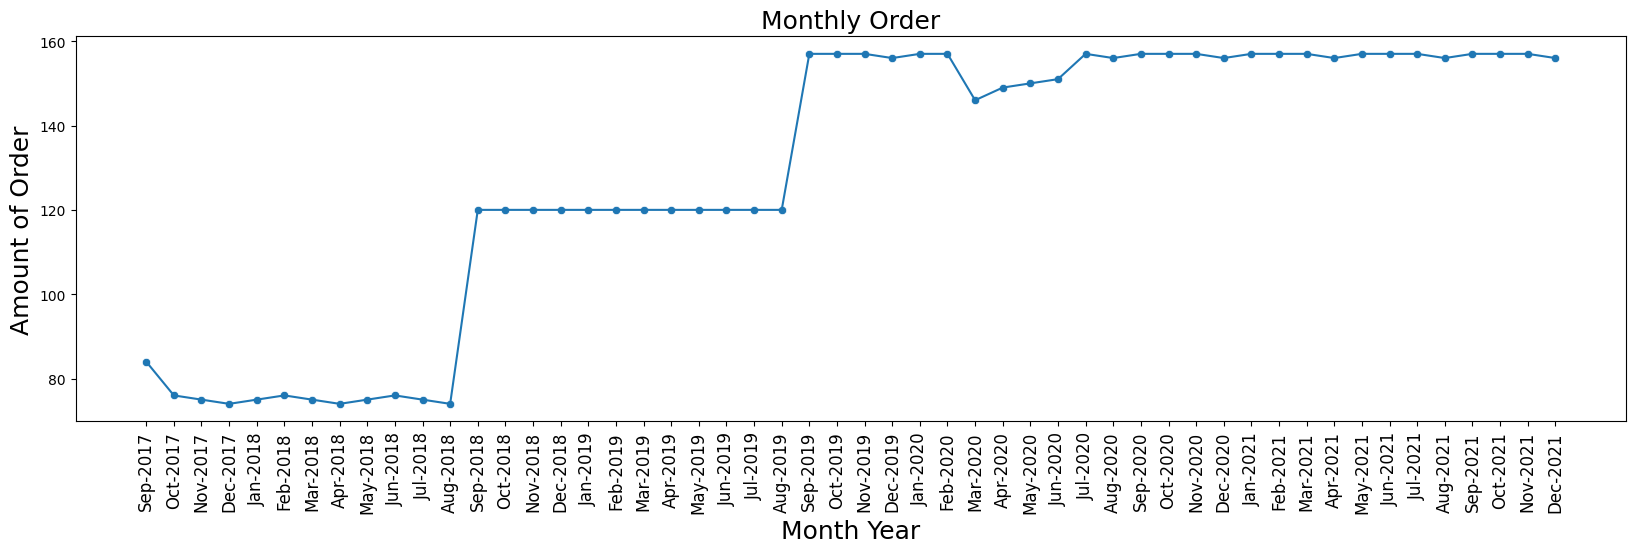

In [15]:
plt.figure(figsize=(20,5))
sns.lineplot(x='monthyear', y='transaction_count', data=df_monthly_order)
sns.scatterplot(x='monthyear', y='transaction_count', data=df_monthly_order)
plt.xticks(rotation=90, fontsize=12)
plt.title('Monthly Order', fontsize=18)
plt.xlabel('Month Year', fontsize=18)
plt.ylabel('Amount of Order', fontsize=18)

**After analyzing the metric related to monthly orders, I have made the following observation:**

- It appears that the monthly order data follows the same pattern as the monthly active customer data. This result is expected since all of the order dates in the dataset are invoiced at the beginning of every month. In other words, it is possible that customers tend to place an order once every month.

### **1.5 Old Customer vs New Customer (Revenue)**

We will also explore whether new customers who made purchases within the same month had an impact on the company's monthly revenue. It is possible that some new customers made a big purchase right away, contributing to the revenue spike.

In [16]:
query= """
WITH first_purch AS (
SELECT
    customer_code,
    MIN(Date) AS firstpurchase
FROM salesdata
GROUP BY customer_code ),

salesdata_first AS (
SELECT *
FROM salesdata AS df
LEFT JOIN first_purch AS df_first
    ON df.customer_code = df_first.customer_code),

newold_customer AS (
SELECT
    Date AS orderdate,
    product_code,
    customer_code,
    sold_quantity,
    gross_price,
    pre_invoice_discount_pct,
    CASE 
        WHEN Date = firstpurchase THEN 'new'
        WHEN Date > firstpurchase THEN 'existing'
        ELSE 'Error' END AS newcustomer
FROM salesdata_first)


SELECT 
    orderdate,
    newcustomer,
    ROUND(SUM((gross_price * sold_quantity) * (1 - pre_invoice_discount_pct)),2) AS gross_sales
FROM newold_customer
GROUP BY orderdate, newcustomer
"""

df_newold_customer = sqldf(query)
df_newold_customer['monthyear'] = pd.to_datetime(df_newold_customer['orderdate']).dt.strftime('%b-%Y')

_**1.5.1 Lineplot: Gross Revenue, New customer (Orange) vs Existing Customer(Blue)**_

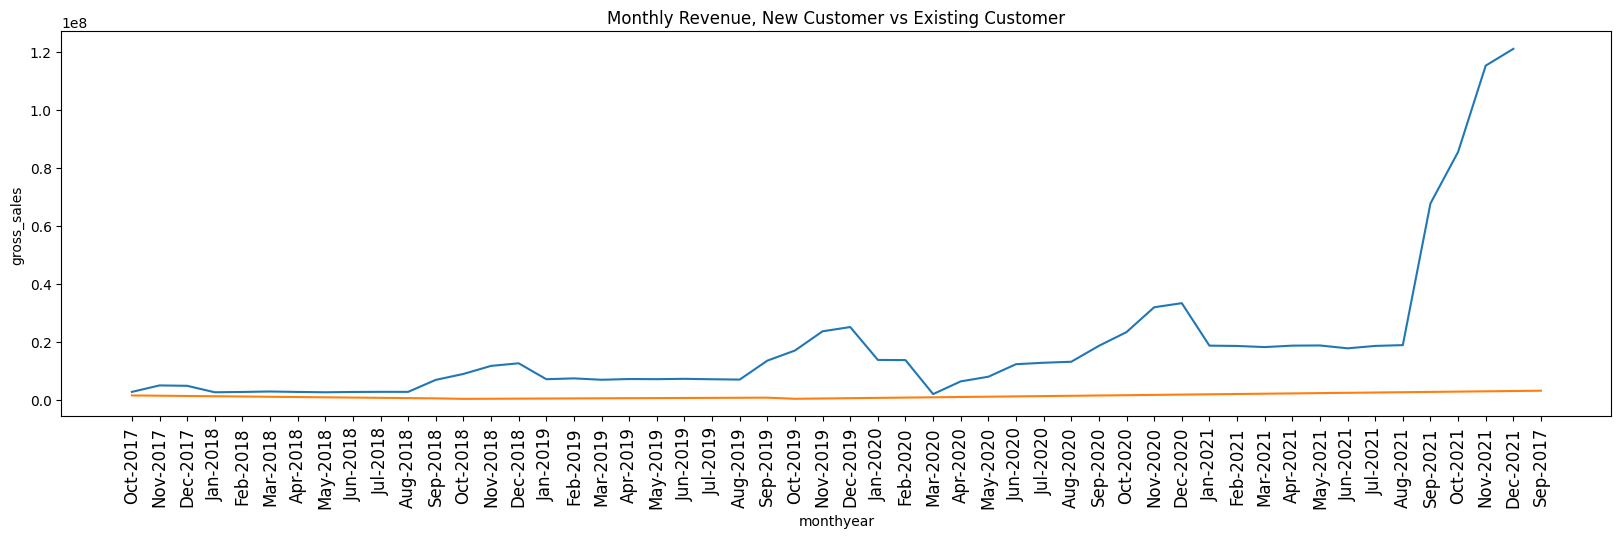

In [17]:

plt.figure(figsize=(20,5))
sns.lineplot(x='monthyear', y='gross_sales', data= df_newold_customer[df_newold_customer['newcustomer']=='existing'])
sns.lineplot(x='monthyear', y='gross_sales', data= df_newold_customer[df_newold_customer['newcustomer']=='new'])
plt.xticks(rotation=90, fontsize=12)
plt.title('Monthly Revenue, New Customer vs Existing Customer')
plt.show()

**Based on our analysis,i have observed that:**

New customers who made purchases within the same month as they joined typically made relatively small purchases compared to existing customers. However, it is possible that new customers made a small initial purchase and then a larger purchase in later months, which could explain the increase in monthly revenue after September (the month with a sudden increase in customer activity). Despite this, it still doesn't explain why there was a significant increase in revenue in September 2021.

## **1.6 Product Performance**

Now let's investigate the performance of each product to determine if the demand for a specific product could be the reason for the sudden increase in revenue.

In [18]:
#monthly sales by product
query = """
SELECT
    Date,
    product,
    ROUND(SUM((gross_price * sold_quantity) - pre_invoice_discount_pct),2) AS gross_sales
FROM salesdata
GROUP BY Date, product 
"""

df_monthly_product = sqldf(query)

In [19]:
df_monthly_product = df_monthly_product.pivot(index='Date', columns='product', values='gross_sales').reset_index()
df_monthly_product = df_monthly_product.fillna(0)
df_monthly_product['monthyear'] = pd.to_datetime(df_monthly_product['Date']).dt.strftime('%b-%Y')

_**1.6.1 Lineplot: Monthly Gross Revenue by products**_

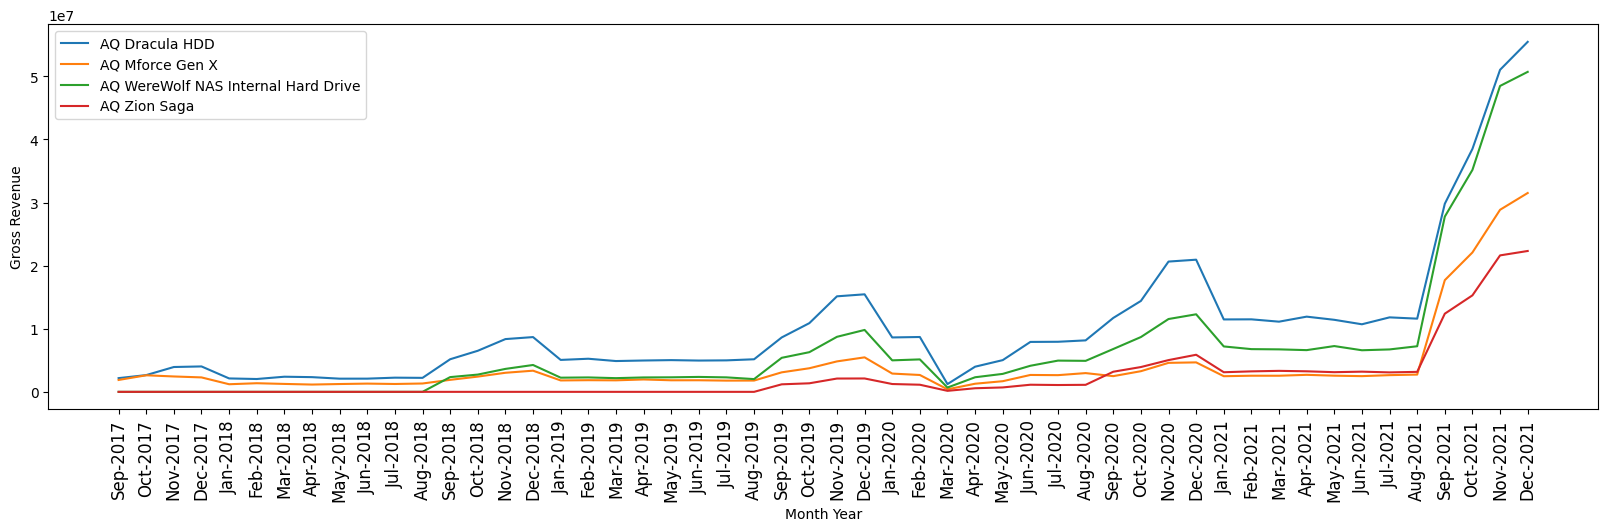

In [20]:
plt.figure(figsize=(20,5))
sns.lineplot(x='monthyear', y='AQ Dracula HDD  3.5 Inch SATA 6 Gb/s 5400 RPM 256 MB Cache', data= df_monthly_product, label='AQ Dracula HDD')
sns.lineplot(x='monthyear', y='AQ Mforce Gen X', data= df_monthly_product, label='AQ Mforce Gen X')
sns.lineplot(x='monthyear', y='AQ WereWolf NAS Internal Hard Drive HDD  8.89 cm', data= df_monthly_product, label='AQ WereWolf NAS Internal Hard Drive')
sns.lineplot(x='monthyear', y='AQ Zion Saga', data= df_monthly_product, label='AQ Zion Saga')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Gross Revenue')
plt.xlabel('Month Year')
plt.legend()
plt.show()

**Observations**
- The sudden increase in demand for all of the company's products from September 2021 onwards could be the reason for the revenue spike.

Based on our data analysis, we have evidence indicating that the sudden increase in monthly revenue was caused by an unexpected increase in demand for computer hardware after August 2021. It's possible that more people were interested in building their own computers, leading to a surge in sales. 

## **1.7 Revenue by market locations**

Now that we have found the reason behind the sudden increase in revenue, let's investigate whether this increase in demand occurred in all of our markets.

In [21]:
#Monthly Revenue by Location
query = """
    SELECT
        Date,
        market,
        ROUND(SUM((gross_price * sold_quantity) - pre_invoice_discount_pct),2) AS gross_sales
    FROM salesdata
    GROUP BY Date, market
"""
df_monthly_sale_market = sqldf(query)

In [22]:
df_monthly_sale_market = df_monthly_sale_market.pivot(index='Date', columns='market', values='gross_sales')
df_monthly_sale_market = df_monthly_sale_market.reset_index()
df_monthly_sale_market['monthyear'] = pd.to_datetime(df_monthly_sale_market['Date']).dt.strftime('%b-%Y')

_**1.7.1 Lineplot: Monthly Gross Revenue by Market Country**_

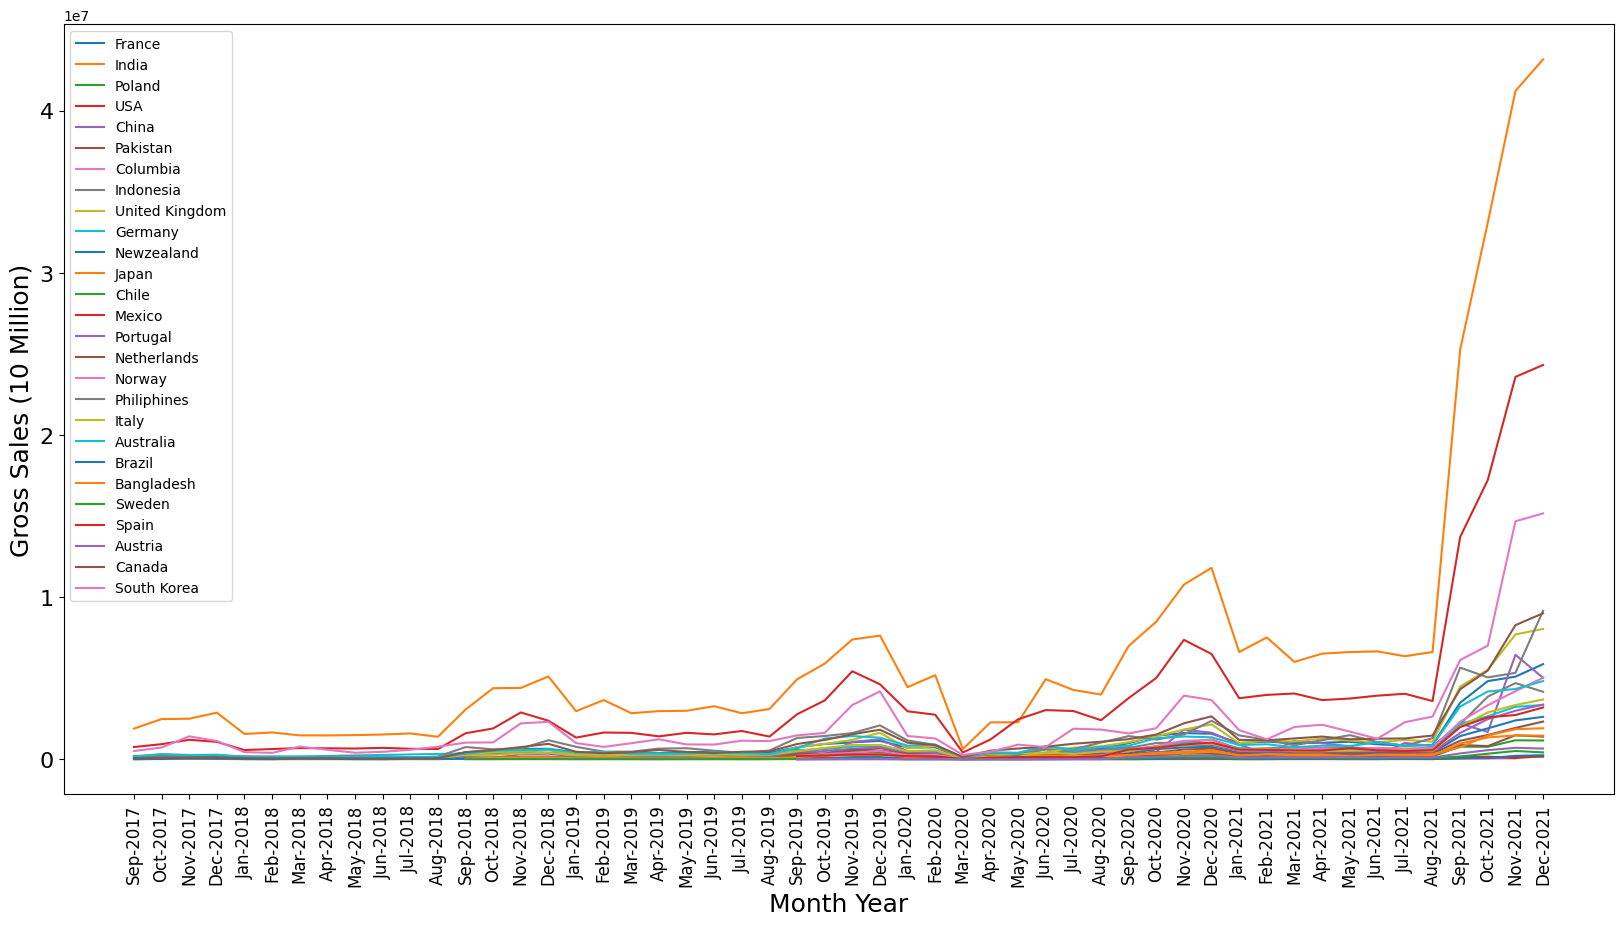

In [23]:
country_list = set(salesdata['market'].tolist())

plt.figure(figsize=(20,10))
for i in country_list:
    sns.lineplot(x = 'monthyear', y=i, data=df_monthly_sale_market, label=i)
    
plt.ylabel('Gross Sales (10 Million)', fontsize=18) 
plt.xlabel('Month Year', fontsize=18) 
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.legend()
plt.show()

**From the line plot, it can be observed that**
- The sudden increase in demand occurred in most of our market locations, with India having the highest spike in demand, followed by USA, South Korea, and Canada.

As an additional analysis, let's examine which products are in high demand by analyzing the revenue in each market based on their respective categories and selling platform.

In [24]:
#Product Preference
query = """
    SELECT
        market,
        category,
        ROUND(SUM((gross_price * sold_quantity) - pre_invoice_discount_pct),2) AS gross_sales
    FROM salesdata
    GROUP BY market, category
"""
df_gross_sale_market = sqldf(query)
df_gross_sale_market = df_gross_sale_market.sort_values('gross_sales', ascending=False)
df_gross_sale_market = df_gross_sale_market.pivot(index='market', columns='category', values='gross_sales')

_**1.7.2 Stacked Bar Chart: Product category Gross Revenue by market country**_

Text(0.5, 0, 'Gross Sales (100 Million)')

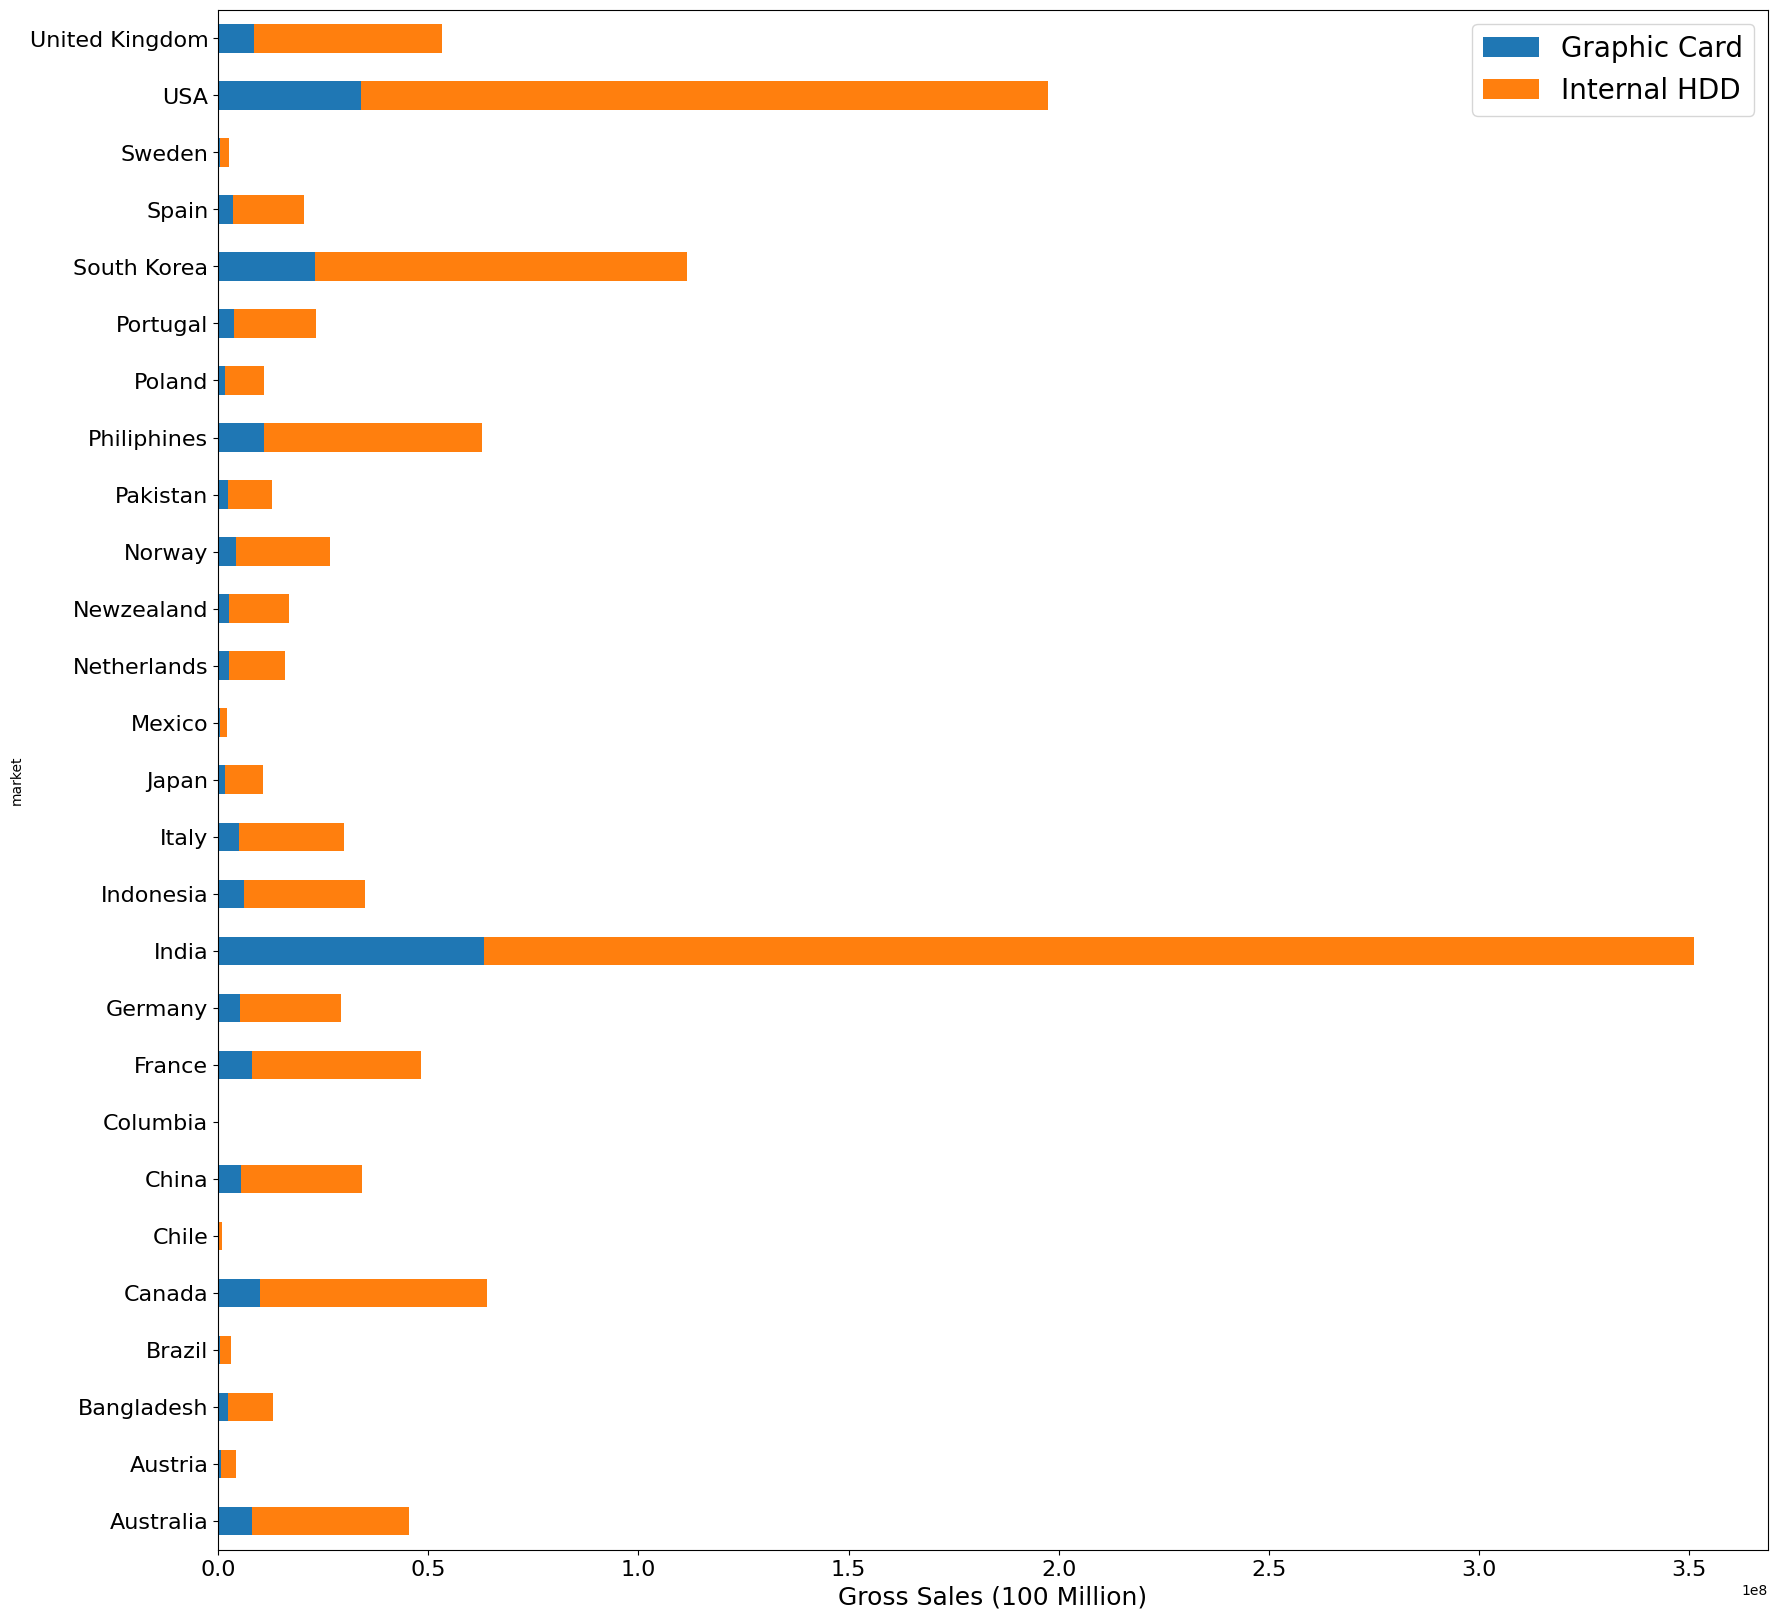

In [25]:
df_gross_sale_market.plot(kind='barh', stacked=True, figsize=(20,20))
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=20)
plt.xlabel('Gross Sales (100 Million)', fontsize=18)

_**1.7.3 Stacked Bar Chart: Product category Gross Revenue by platform**_

Text(0, 0.5, 'Gross Sales (100 Million)')

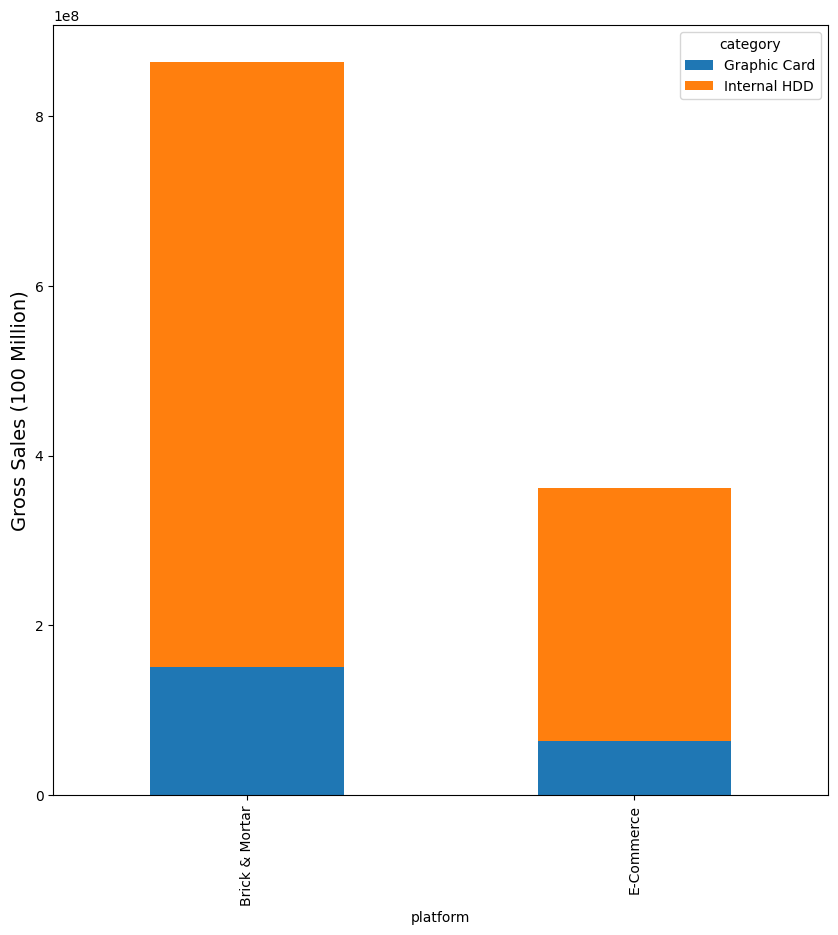

In [26]:
#gross sales by platforms
query = """
SELECT
    platform,
    category,
    ROUND(SUM((gross_price * sold_quantity) - pre_invoice_discount_pct),2) AS gross_sales
FROM salesdata
GROUP BY platform, category
"""
df_gross_sale_customerplatform = sqldf(query)
df_gross_sale_customerplatform = df_gross_sale_customerplatform.pivot(index='platform', columns='category', values='gross_sales')
df_gross_sale_customerplatform.plot(kind='bar', stacked=True, figsize=(10,10))
plt.ylabel('Gross Sales (100 Million)', fontsize=14)

From the analysis of revenue by product category and market location, I found that:

- 1.7.2, The hard disk category dominate revenue generating product in most of the market locations. 
- 1.7.3, The proportion of hard disk and graphic card revenue by market location shows that most of our revenue comes from the sales of computer hardware to brick and mortar stores while revenue from e-commerce platforms accounts for less than half of brick and mortar platforms.

## 1.8 Insights

In conclusion, based on the EDA:

- Q4-2021 revenue spike is likely due to a massive increase in demand for computer hardware, particularly internal HDDs.
- The company experienced a higher revenue spike in 2021 compared to previous years, where revenue usually increases in Q4.
- India is the biggest market for the company.
- New customers who joined in September and October tended to have a small first purchase but might have later made larger purchases as they grew confident in the company.
- Most of the revenue comes from sales to Brick and Mortar stores, with revenue from E-commerce platforms accounting for less than half.

## **Based on the EDA, we can attribute the Q4-2021 revenue spike to a massive increase in demand of computer hardwares in that period.**